<a href="https://colab.research.google.com/github/Turu594/-YES-BANK-STOCK-CLOSING-PRICE-PREDICTION/blob/main/YES_BANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YES BANK STOCK CLOSING PRICE PREDICTION**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

In [17]:
# calling libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv')

In [4]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [9]:
dataset.shape

(185, 5)

In [10]:
list(dataset.columns)

['Date', 'Open', 'High', 'Low', 'Close']

Dataset we have 185 rows and 5 column. Here our dependent variable is Close and Independent variable is Open, High and Low
Date :- It denotes the month and year of the for a particular price.

Open :- Open means the price at which a stock started trading that month.

High :- refers to the maximum price that month.

Low :- refers to the minimum price that month.

Close :- refers to the final trading price for that month, which we have to predict using regression

In [11]:
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

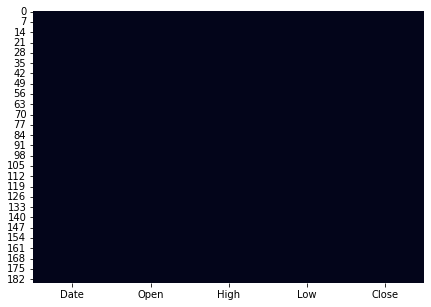

In [12]:
fig,ax=plt.subplots(figsize=(7,5))
sns.heatmap(dataset.isnull(),cbar= False, ax=ax)
plt.show()

In [13]:
len(dataset[dataset.duplicated()])

0

 Do not have any duplicates in dataset

Data Type Change :-

The Given Date in data is of format MMM-YY is converted to proper date of YYYY-MM-DD.
Since, Date column has dtype as object we've to convert it into datetime format

In [14]:
# Importing datetime 
from datetime import datetime
# converting date to proper format of date
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [15]:
dataset.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


VISUALIZING THE DEPENDENT VARIABLE

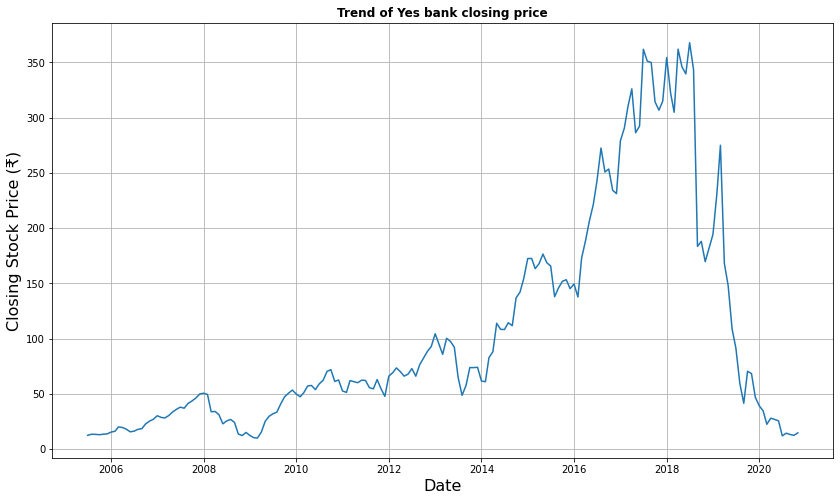

In [22]:
# trend of dependent variable 
plt.figure(figsize = (14,8))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold')
plt.plot(dataset['Date'],dataset['Close'])
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price (₹)',fontsize = 16)
plt.show()

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks

**VIsualize all close,high,open and low price of stock**

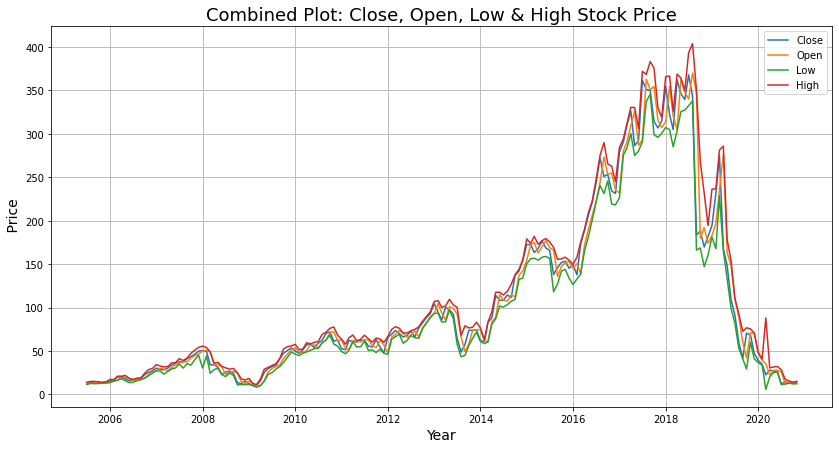

In [29]:
plt.figure(figsize=(14,7))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel(' Price' ,fontsize=14)
plt.plot(dataset['Date'], dataset['Close'])
plt.plot(dataset['Date'], dataset['Open'])
plt.plot(dataset['Date'], dataset['Low'])
plt.plot(dataset['Date'], dataset['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=18)
plt.show()

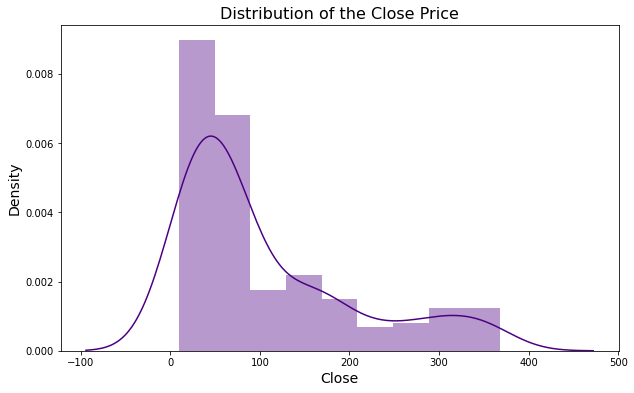

In [28]:
#Checking the distribution of our dependent variable 
plt.figure(figsize = (10,6))
sns.distplot(dataset['Close'],color = 'indigo')
plt.title('Distribution of the Close Price',fontsize = 16)
plt.xlabel('Close',fontsize = 14)
plt.ylabel('Density',fontsize = 14)
plt.show()

The distribution of Stock Closing Price is rightly skewed distribution. It may lead us to misleading results in view of statistical hyposthesis. It can be corrected by applying Log Transformation then we'll have a look how this data behave

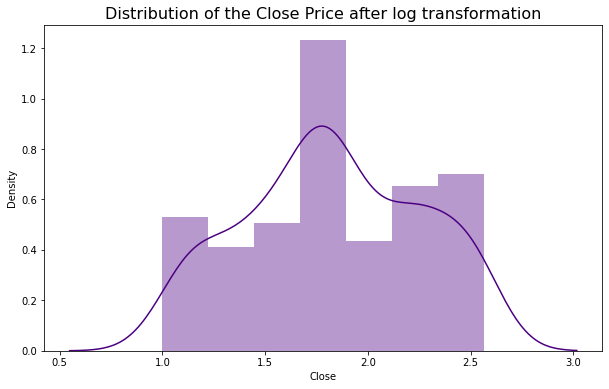

In [27]:
#Distribution after applying Log Transformation
plt.figure(figsize = (10,6))
sns.distplot(np.log10(dataset['Close']),color = 'indigo')
plt.title('Distribution of the Close Price after log transformation',fontsize = 16)
plt.show()

**Analyze of Numerical variables**

In [30]:
dataset.describe().columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [31]:
# List of independent features
numerical_features = list(set(dataset.describe().columns)-{'Close'})
numerical_features

['Low', 'Open', 'High']

<function matplotlib.pyplot.show>

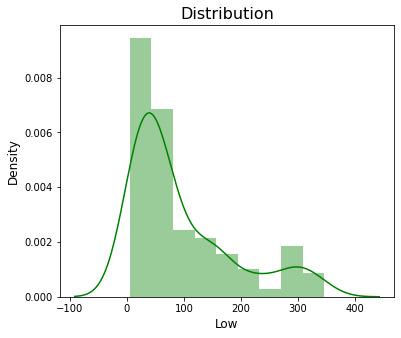

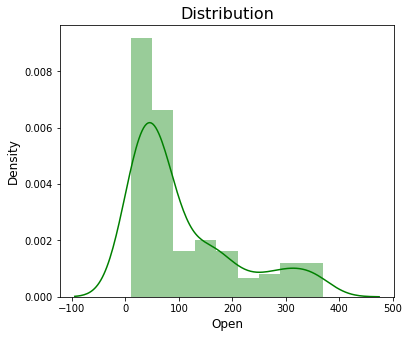

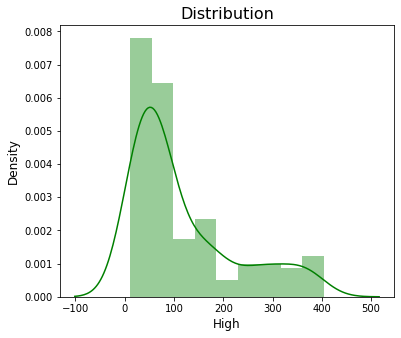

In [33]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(dataset[col], color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

It looks all numerical features are rightly skewed.

Apply log transformation to make normal.

<function matplotlib.pyplot.show>

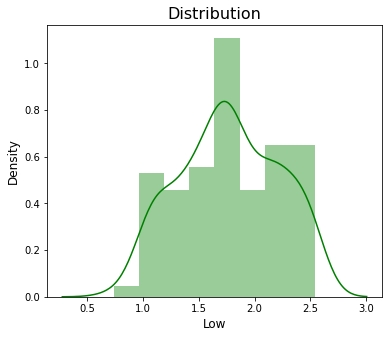

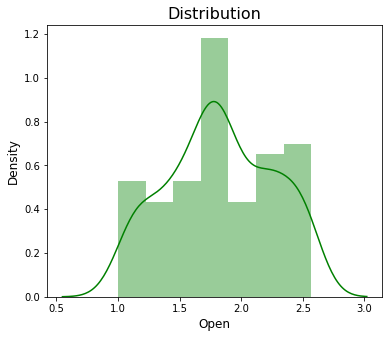

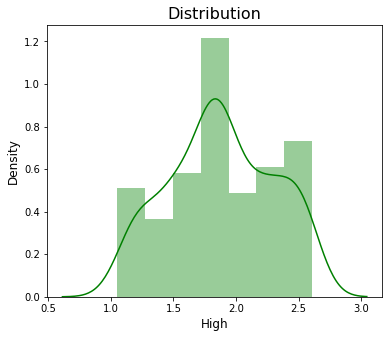

In [34]:
# Applying log transformation
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(dataset[col]), color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

Now looks like normally distrubuted

# **Regression plot**

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.

Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

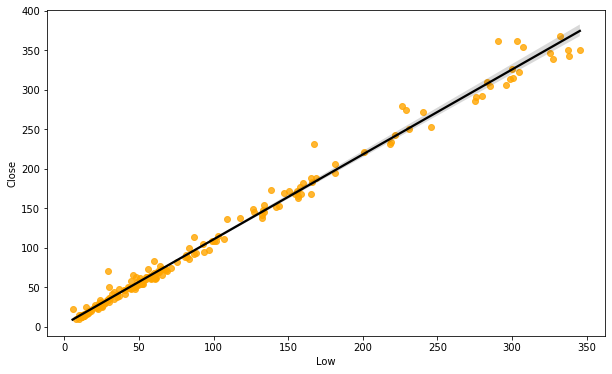

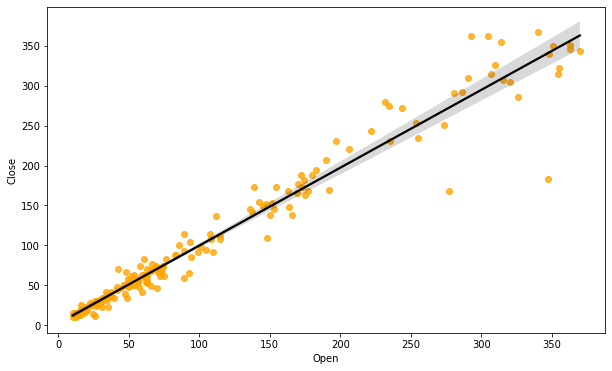

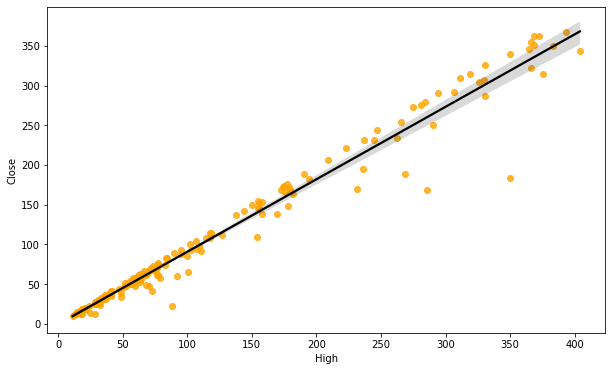

In [36]:
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=dataset[col],y=dataset['Close'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

From the above regression plot of all numerical features we see that the columns 'low', 'high', 'Open' are positively relation to the target variable.

which means the Close increases with increase of these features.

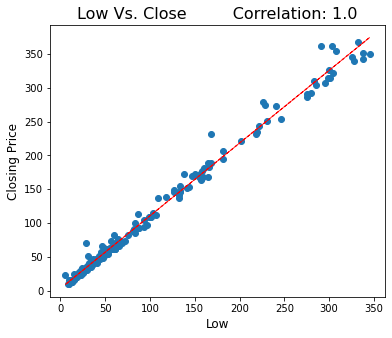

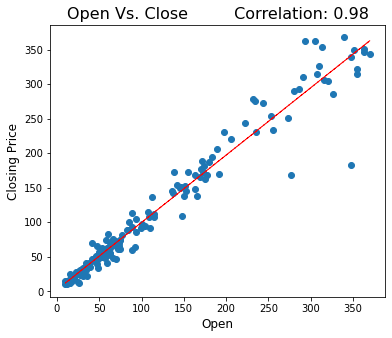

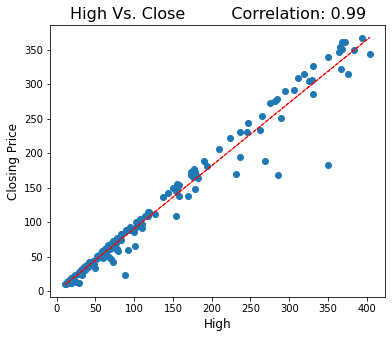

In [39]:
# Now to plot scatter plot with best fit line.
for col in numerical_features:
   fig = plt.figure(figsize=(6, 5))
   ax = fig.gca()
   feature = dataset[col]
   label = dataset['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col, fontsize=12)
   plt.ylabel('Closing Price', fontsize=12)
   ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
   z = np.polyfit(dataset[col], dataset['Close'], 1)
   y_hat = np.poly1d(z)(dataset[col])
 
   plt.plot(dataset[col], y_hat, "r--", lw=1)

# Normalise Closing Price column data

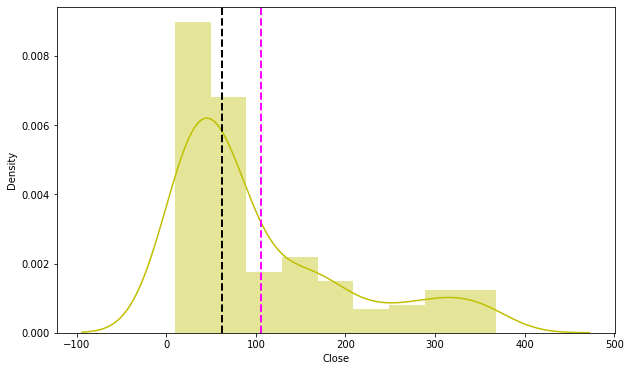

In [40]:
#Distribution plot of Closing Price
plt.figure(figsize=(10,6))
plt.xlabel('Closing Price')
plt.ylabel('Density')
ax=sns.distplot(dataset['Close'],hist=True ,color="y")
ax.axvline(dataset['Close'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(dataset['Close'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that Closing Price has moderate right skewness.

Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal. 

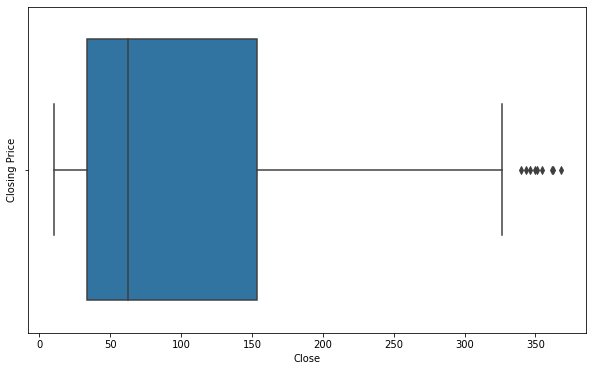

In [41]:
#Boxplot of Closing Price to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Closing Price')
sns.boxplot(x=dataset['Close'])
plt.show()

The above boxplot shows that we have detect outliers in Close column.

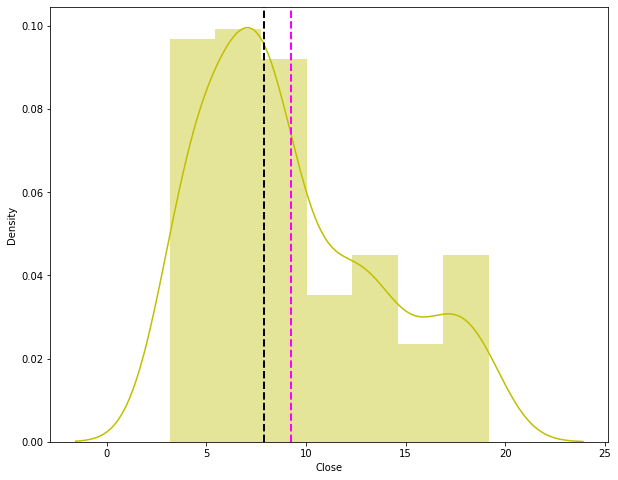

In [42]:
#Applying square root to Closing Price to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Closing Price')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(dataset['Close']), color="y")
ax.axvline(np.sqrt(dataset['Close']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(dataset['Close']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal.

After applying Square root to the skewed Closing Price here we get almost normal distribution.

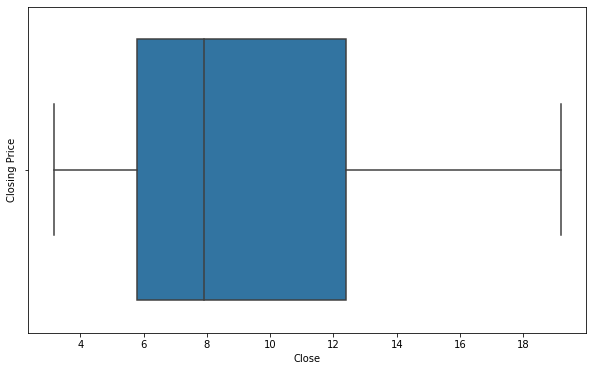

In [43]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Closing Price')
sns.boxplot(x=np.sqrt(dataset['Close']))
plt.show()

In [45]:
dataset.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


After applying Square root to the Close column, we find that there is no outliers present.

# Heatmap
we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables

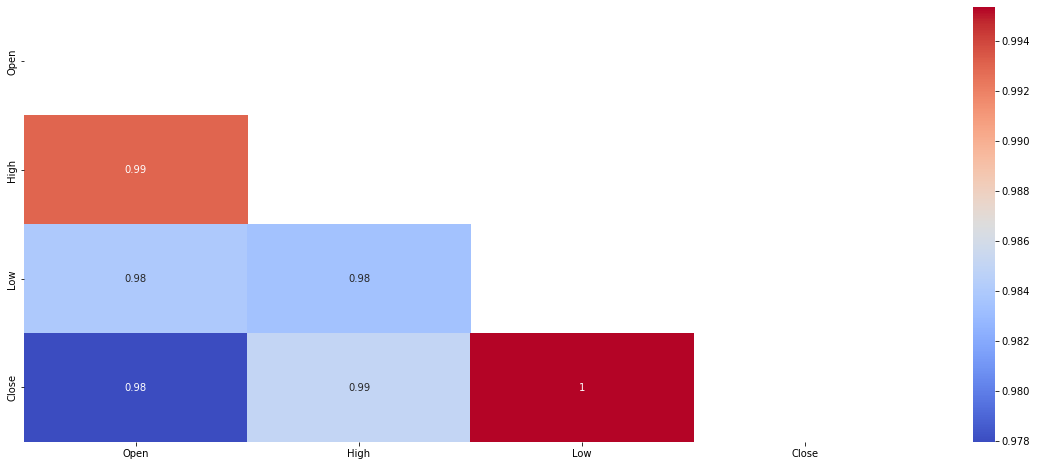

In [46]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=dataset.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'Correlation Map')

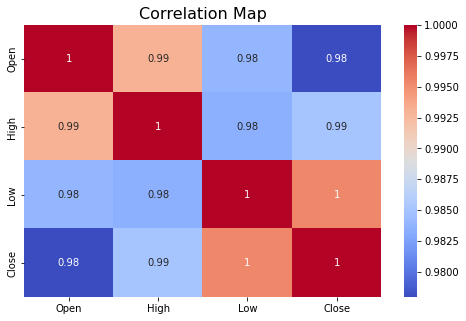

In [47]:
#Lets find correlation with heatmap
plt.figure(figsize=(8,5))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation Map", fontsize=16)

There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

In [48]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
  vif = pd.DataFrame()
  vif['Variables'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
  return (vif)

In [49]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


We have very high VIF in our dataset so, we have to drop one them which is least correlated with dependent variable

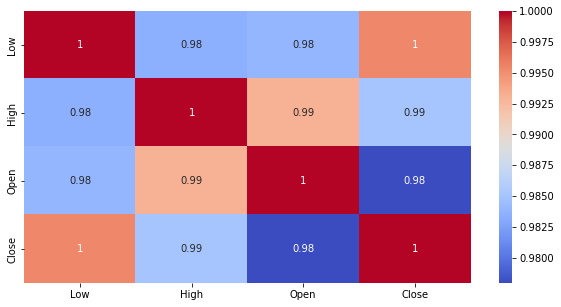

In [50]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(dataset[['Low','High','Open','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

Now, we'll drop Open feature from the VIF matrix.

In [53]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Date','Close','Open']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


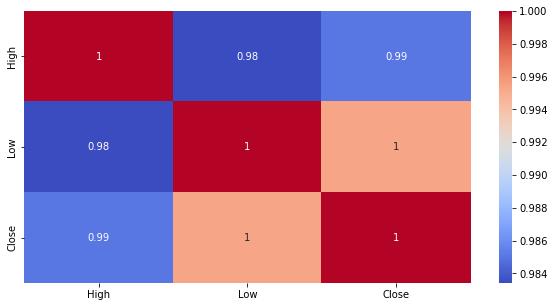

In [54]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(dataset[['High','Low','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

Our final dropping variable will be High feature because it has less correlation with dependent variable in comparison with dependet variable(Close).

We've dropped 3 features from our dataset it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the Low Variable.

## Model Training
# Train Test split for regression

In [55]:
# Splitting our data into Dependent and Independent Variables
X = dataset.drop(columns=['Close','Date'])
y = dataset['Close']

In [56]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [57]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [58]:
#shape of training dataset.
X_train.shape

(148, 3)

In [59]:
#shape of testing dataset.
X_test.shape

(37, 3)

# LINEAR REGRESSION

In [60]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [61]:
#check the score
reg.score(X_train, y_train)

0.8146653424416905

In [62]:
reg.score(X_test, y_test)

0.8225699915389754

In [63]:
#check the coefficeint
reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [64]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [65]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 0.03365939576594667
RMSE : 0.1834649714957781
MAE : 0.15591697668200555
R2 : 0.8146653424416905
Adjusted R2 : 0.7978167372091169
